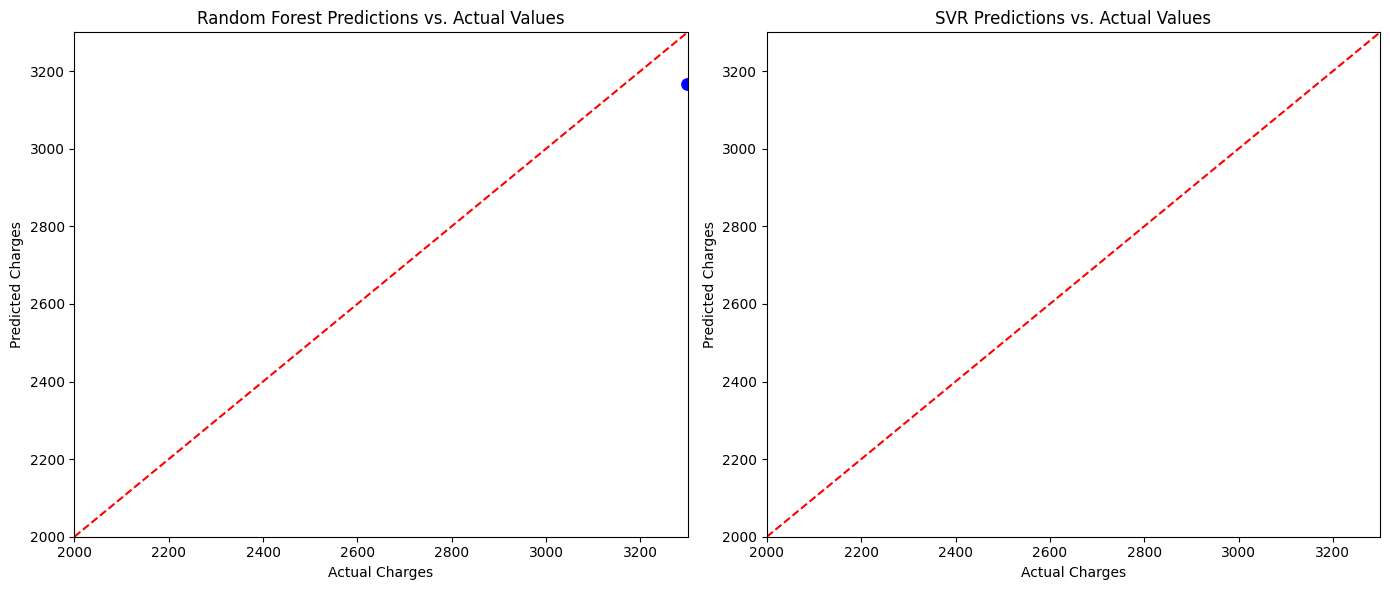

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Sample DataFrame
data = {
    'bmi': [22, 24, 35, 27, 28, 42, 26],
    'age': [25, 30, 45, 50, 35, 40, 29],
    'charges': [2000, 3000, 5000, 7000, 2100, 3300, 4120]
}

df = pd.DataFrame(data)

# Prepare data
X = df[['bmi', 'age']]
y = df['charges']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Train Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# Create a DataFrame for comparison
results = pd.DataFrame({
    'Actual': y_test,
    'Random Forest Predictions': rf_predictions,
    'SVR Predictions': svr_predictions
})

# Plotting
plt.figure(figsize=(14, 6))

# Scatter plot for Random Forest results
plt.subplot(1, 2, 1)
sns.scatterplot(data=results, x='Actual', y='Random Forest Predictions', color='blue', s=100)
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()], 'r--')  # Diagonal line
plt.title('Random Forest Predictions vs. Actual Values')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.xlim([results['Actual'].min(), results['Actual'].max()])
plt.ylim([results['Actual'].min(), results['Actual'].max()])

# Scatter plot for SVR results
plt.subplot(1, 2, 2)
sns.scatterplot(data=results, x='Actual', y='SVR Predictions', color='green', s=100)
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()], 'r--')  # Diagonal line
plt.title('SVR Predictions vs. Actual Values')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.xlim([results['Actual'].min(), results['Actual'].max()])
plt.ylim([results['Actual'].min(), results['Actual'].max()])

plt.tight_layout()
plt.show()
